# [Data Set](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.
- **Complain:** customer has complaint or not.
- **Satisfaction Score:** Score provided by the customer for their complaint resolution.
- **Card Type:** type of card hold by the customer.
- **Points Earned:** the points earned by the customer for using credit card.

In [125]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from src.plot_function import *


custom_palette = {
    'Left': '#c53b53',
    'Non-Left': '#394b70'
}
sns.color_palette(list(custom_palette.values()))

[(0.7725490196078432, 0.23137254901960785, 0.3254901960784314),
 (0.2235294117647059, 0.29411764705882354, 0.4392156862745098)]

In [126]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_curve, auc as calculate_auc

In [127]:
import xgboost as xgb
import optuna

In [128]:
df = pd.read_csv('data/Customer-Churn-Records.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [129]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [131]:
df.duplicated().sum()

np.int64(0)

In [132]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [133]:
df['Exited_label'] = df['Exited'].map({0: 'Non-Left', 1: 'Left'})

In [134]:
df['Geography'].unique(), df['Gender'].unique(), df['Tenure'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0]))

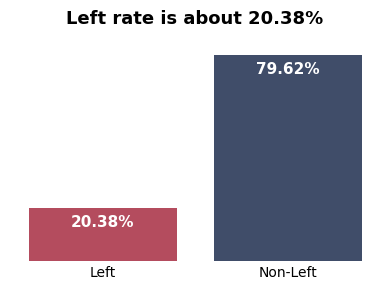

In [135]:
hue='Exited_label'
visualizer = DataVisualizer(df)
visualizer.plot_seaborn_bar(custom_palette=custom_palette, hue=hue)

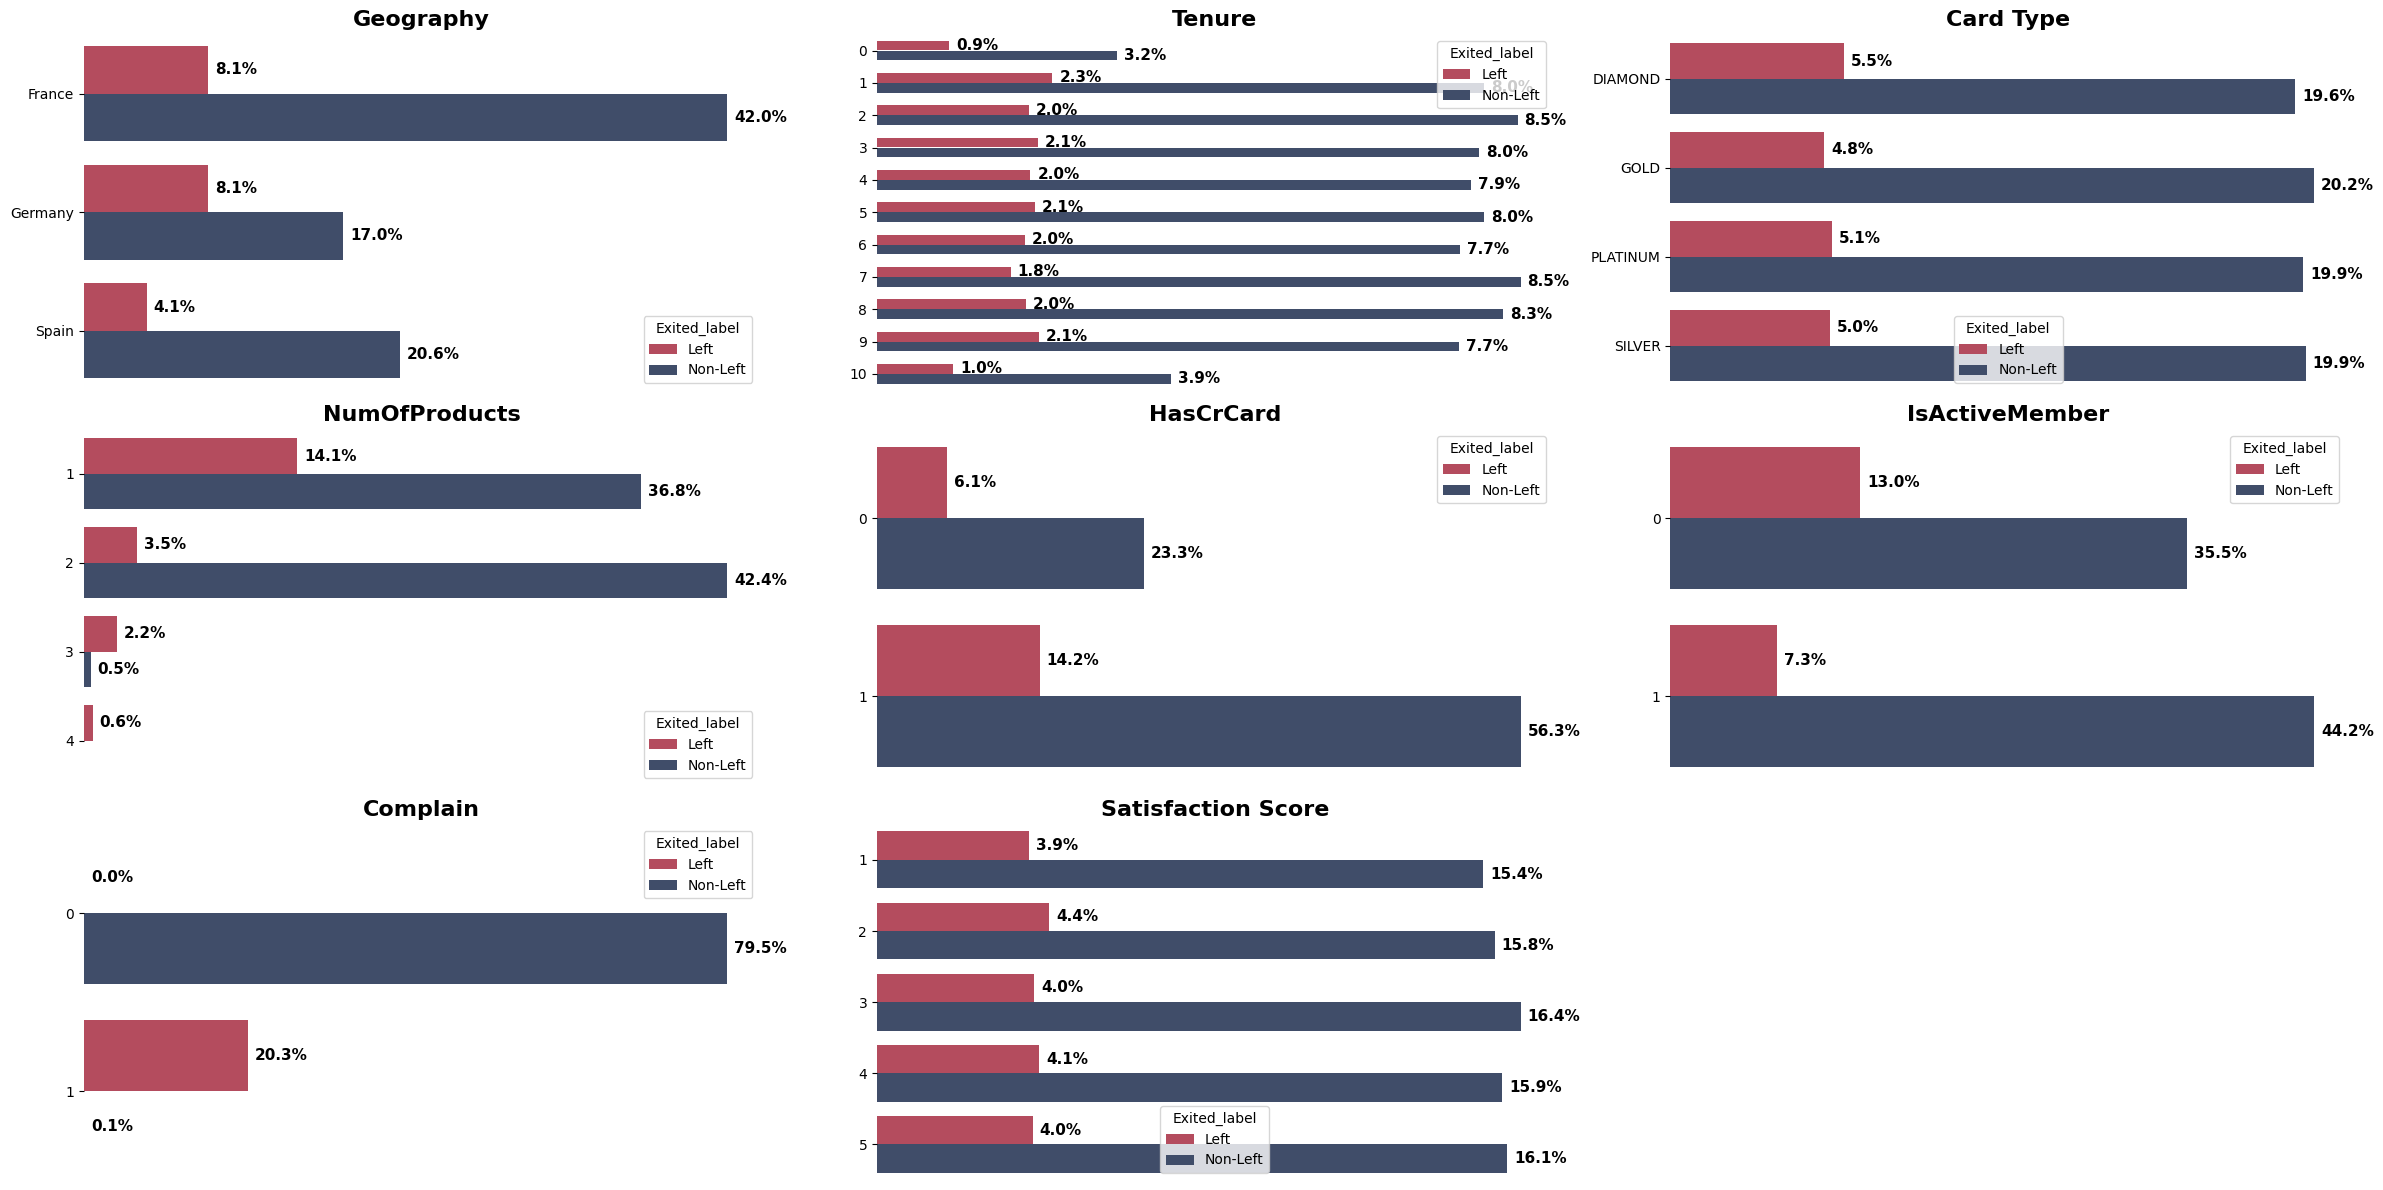

In [136]:
barplot_features = ['Geography', 'Tenure', 'Card Type', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']

hue = 'Exited_label'

visualizer = DataVisualizer(df)
visualizer.plot_barplot(barplot_features, hue=hue, custom_palette=custom_palette)

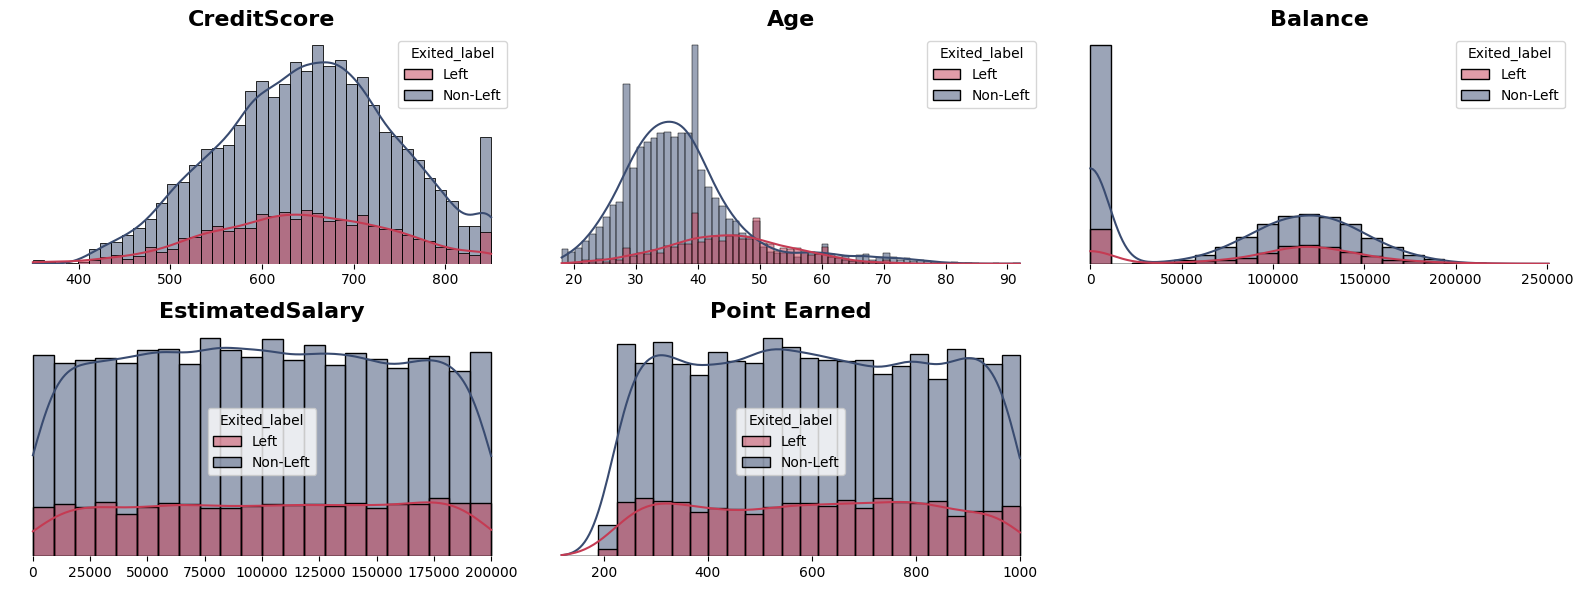

In [137]:
histogram_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

hue_choice='Exited_label'
visualizer = DataVisualizer(df, figsize=(16, 6))
visualizer.plot_histplot(features=histogram_features, custom_palette=custom_palette, hue=hue_choice, kde=True)

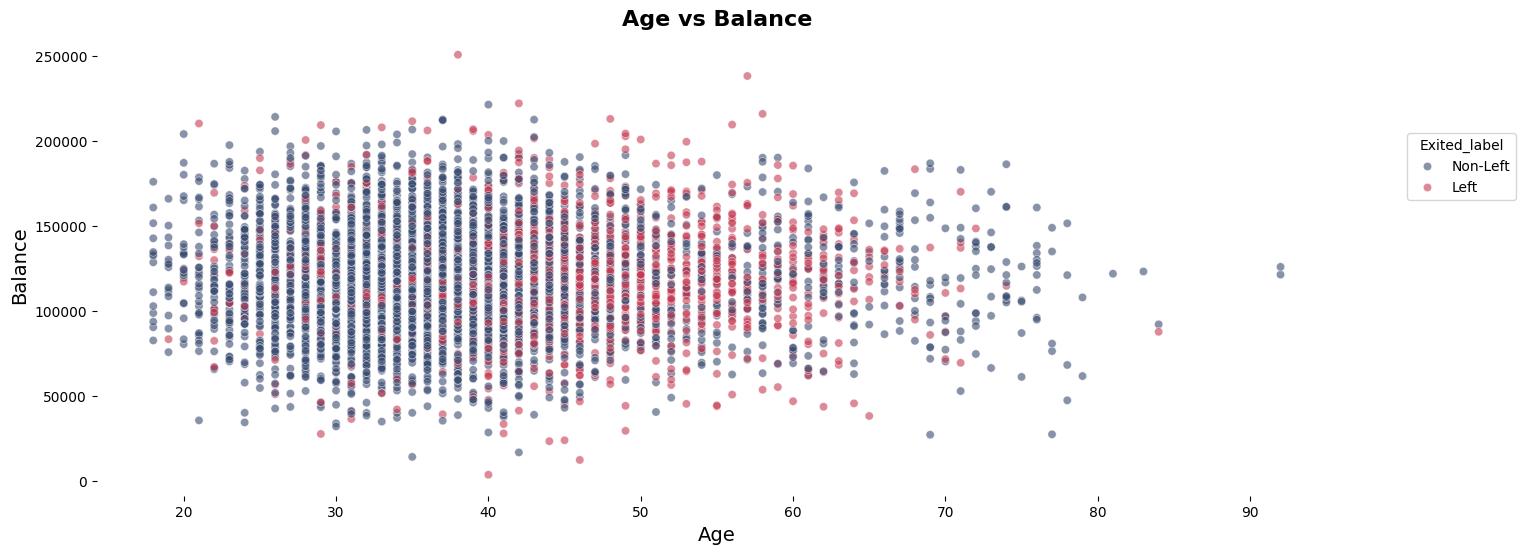

In [138]:
x = 'Age'
y = 'Balance'
hue = 'Exited_label'
df_filtered = df.loc[~(df[['Balance']] == 0).any(axis=1)]
visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

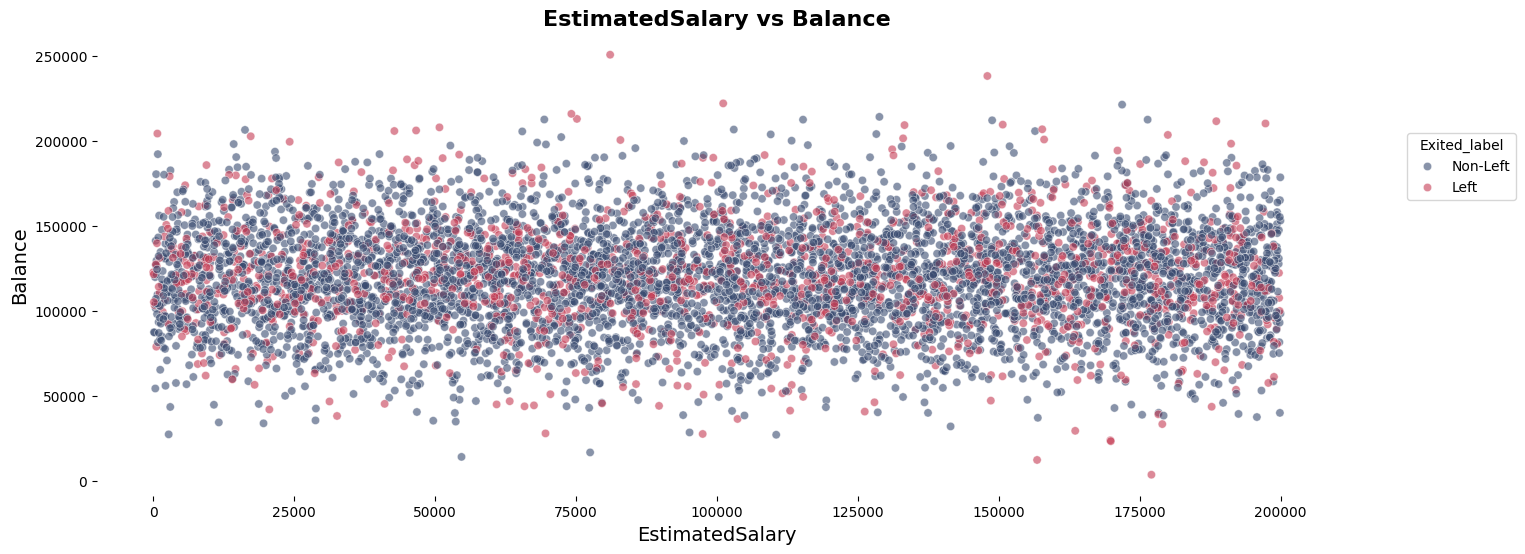

In [139]:
x = 'EstimatedSalary'
y = 'Balance'
hue = 'Exited_label'
# df_filtered = df.loc[~(df[['Balance']] == 0).any(axis=1)]
visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

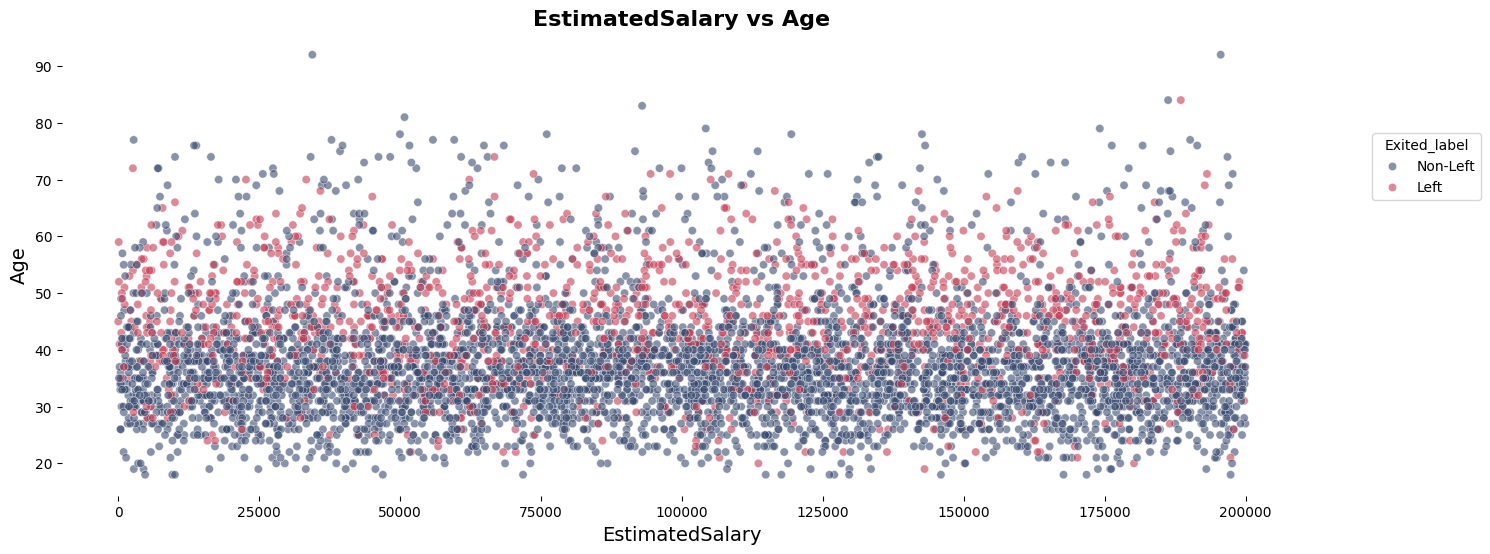

In [140]:
y = 'Age'
x = 'EstimatedSalary'
hue = 'Exited_label'

visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

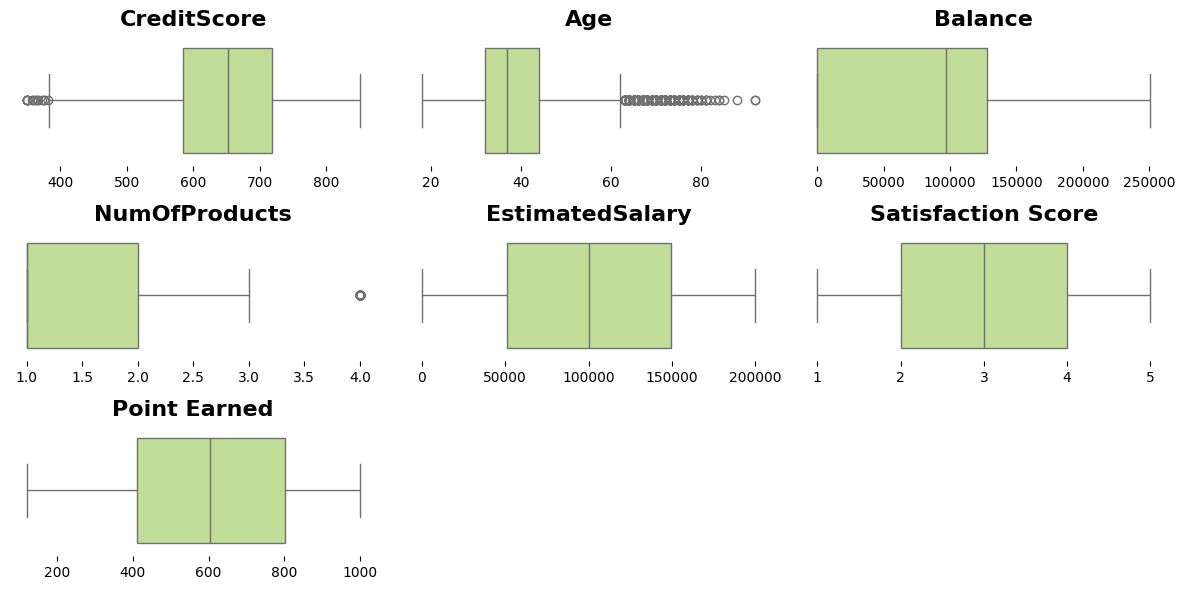

In [141]:
boxplot_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# data_visualizations(df, boxplot_features, boxplot=True, figsize=(12, 6))

visualizer = DataVisualizer(df, figsize=(12, 6))
visualizer.plot_boxplot(features=boxplot_features)

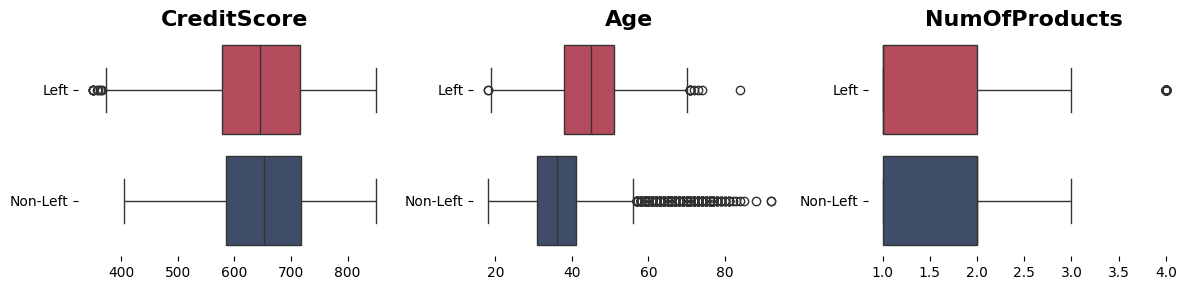

In [142]:
boxplot_features = ['CreditScore', 'Age', 'NumOfProducts']
hue = 'Exited_label'

visualizer = DataVisualizer(df, figsize=(12, 3))
visualizer.plot_boxplot(features=boxplot_features, hue=hue, custom_palette=custom_palette)

---

# Features Engineer

In [143]:
# df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
# df['AgeGroup'].unique()

In [144]:
df['BalanceCategory'] = pd.cut(df['Balance'], bins=[-float('inf'), 0, 10000, 20000, float('inf')], labels=['Negative', 'Low', 'Medium', 'High'])
df['BalanceCategory'].unique()

['Negative', 'High', 'Medium', 'Low']
Categories (4, object): ['Negative' < 'Low' < 'Medium' < 'High']

In [145]:
# df['ProductsActive'] = df['NumOfProducts'] * df['IsActiveMember']
# df['ProductsActive'].unique()

In [146]:
# df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

In [147]:
df['Avg_Balance_Per_Geo'] = df.groupby('Geography')['Balance'].transform('mean')

In [148]:
# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(df[['Age', 'Balance']])
# df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'Balance']))
# df = pd.concat([df, df_poly.drop(['Age', 'Balance'], axis=1)], axis=1)
# df_poly

---

# Encoder

## StandardScaler

In [149]:
scaler = StandardScaler()
df[['Balance_StandardScaler', 'CreditScore_StandardScaler']] = scaler.fit_transform(df[['Balance', 'CreditScore']])

---

## LabelEncoder

In [150]:
label_encoder = LabelEncoder()

In [151]:
df['Geography_Encoded'] = label_encoder.fit_transform(df['Geography'])
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])
df['Card_Type_Encoded'] = label_encoder.fit_transform(df['Card Type'])

---

## OrdinalEncoder

In [152]:
ordinal_encoder = OrdinalEncoder(categories=[['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER']])
df['Card_Type_Encoded'] = ordinal_encoder.fit_transform(df[['Card Type']])


In [153]:
# ordinal_encoder = OrdinalEncoder(categories=[['High', 'Medium', 'Low', 'Negative']])
# df['BalanceCategory_Encoded'] = ordinal_encoder.fit_transform(df[['BalanceCategory']])

---

In [154]:
features_drop = ['Exited', 'Exited_label', 'Geography', 'Gender', 'Card Type', 'BalanceCategory', 'Balance', 'CreditScore', 'Complain']

In [155]:
X = df.drop(features_drop, axis=1).values
y = df['Exited'].values

In [156]:
X_standard = scaler.fit_transform(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, random_state =42)

In [158]:
def objective(trial):
    params = {'objective': 'reg:squarederror',
              'n_estimators': 5000,
              'seed' : 42,
              'verbosity' : 0,
              'learning_rate' : trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
              'max_depth' : trial.suggest_int('max_depth', 1, 10),
              'subsample' : trial.suggest_float('subsample', 0.05, 1.0),
              'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.05, 1.0),
              'min_child_weight' : trial.suggest_int('min_child_weight', 1, 20)}

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train, verbose=0)

    predictions = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, predictions)
    return auc

In [159]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print(f"Best hyperparameters: {study.best_params}")
# print(f"Best accuracy: {study.best_value}")

In [160]:
# roc_auc_score
best_params = {'learning_rate': 0.0011565921292092409, 
               'max_depth': 6, 
               'subsample': 0.898789718081241, 
               'colsample_bytree': 0.5414526843520394, 
               'min_child_weight': 15}

In [161]:
model = xgb.XGBClassifier(**best_params)

In [162]:
model.fit(X_train, y_train)
# predictions = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)
auc

np.float64(0.8622016673179367)

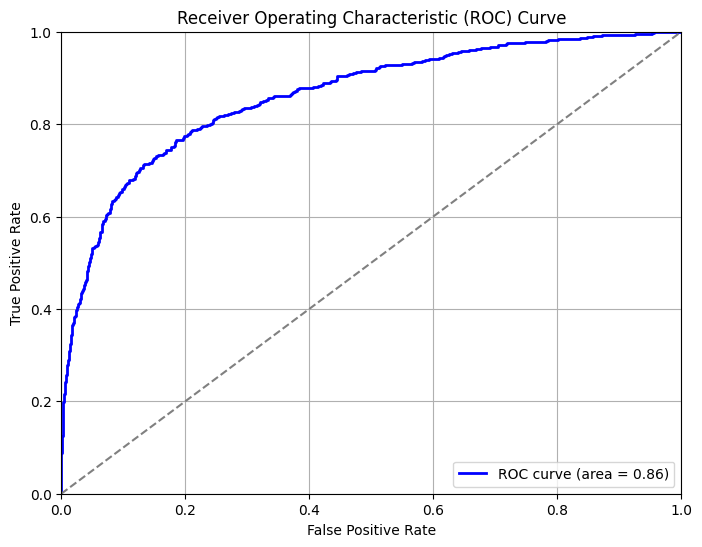

In [163]:
# Calculando FPR, TPR e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculando o AUROC
roc_auc = calculate_auc(fpr, tpr)  # Usando a função renomeada

# Plotando o gráfico ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
plt.show()